In [1]:
from __future__ import division, print_function
import sys, os, glob, gc, warnings
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
import matplotlib.pyplot as plt

import healpy as hp

from desiutil.plots import init_sky, plot_sky_binned

In [2]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

plt.rcParams['image.cmap'] = 'seismic'

In [3]:
nside = 64
npix = hp.nside2npix(nside)
pix_area = hp.pixelfunc.nside2pixarea(nside, degrees=True)

hp_table_south = Table.read('data/sky_residual_dr8_south_64.txt', format='ascii.commented_header')
hp_table_north = Table.read('data/sky_residual_dr8_north_64.txt', format='ascii.commented_header')

mask = hp_table_north['dec'] > 32.375
hp_table_north = hp_table_north[mask]
mask = hp_table_south['dec'] <= 32.375
hp_table_south = hp_table_south[mask]

hp_table = vstack([hp_table_north, hp_table_south])

In [4]:
col_list = ['count', 'g_sky', 'r_sky', 'z_sky']
vrange_list = [None, 0.001, 0.002, 0.004]

In [7]:
# hp_mask = np.isfinite(hp_table['count'])

mask_south = hp_table['dec'] <= 32.375
mask_north = hp_table['dec'] > 32.375

min_count_north = 200
min_count_south = 250
hp_mask = ((hp_table['count']>min_count_north) & mask_north) | ((hp_table['count']>min_count_south) & mask_south)

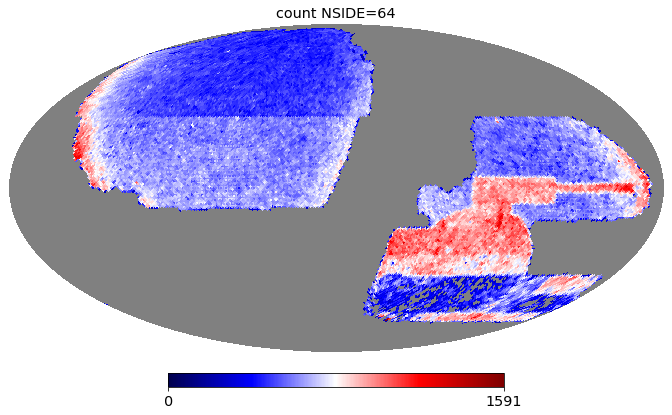

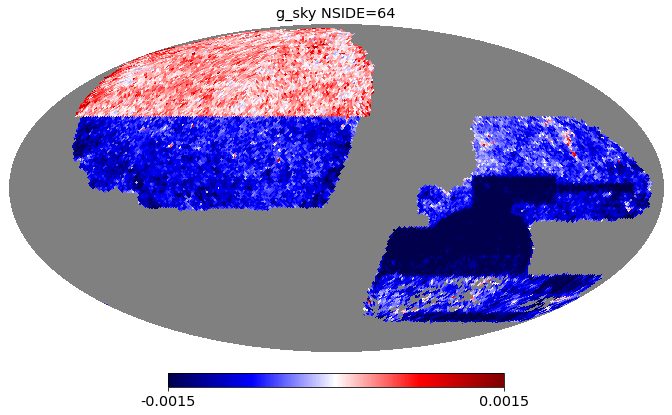

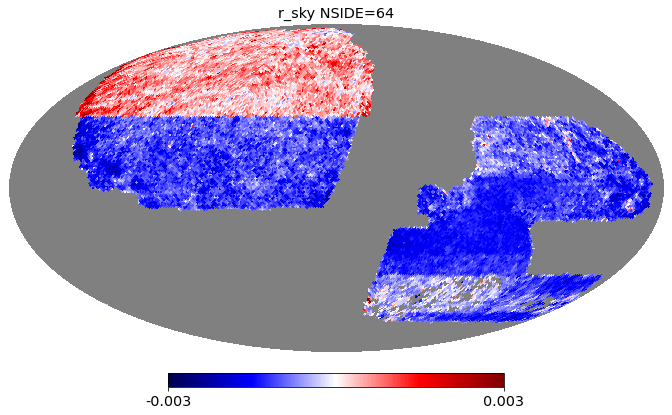

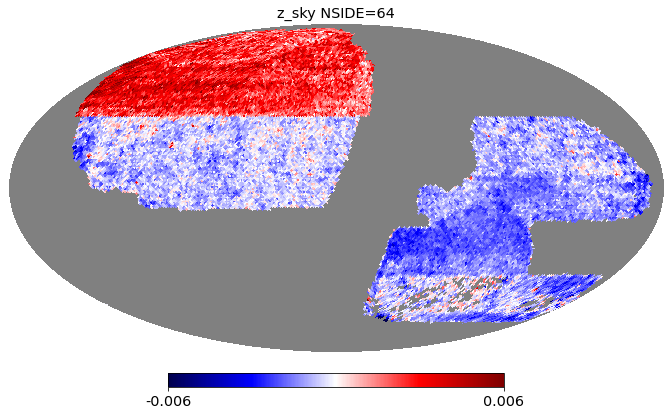

In [8]:
for col, vrange in zip(col_list, vrange_list):

    density = np.zeros(npix)  # density (per sq deg)
    mplot_mask = np.zeros(npix, dtype=bool)
    density[hp_table['hp_idx'][hp_mask]] = hp_table[col][hp_mask]
    mplot_mask[hp_table['hp_idx'][hp_mask]] = True
    mplot = hp.ma(density)
    mplot.mask = ~mplot_mask

    plt.figure(figsize=(9.7, 6))
    if col=='count':
        hp.mollview(mplot, min=0, max=None, rot=(120, 0, 0), fig=1, xsize=8000, title='{} NSIDE={}'.format(col, nside))
    else:
        hp.mollview(mplot, min=-vrange*1.5, max=vrange*1.5, rot=(120, 0, 0), fig=1, xsize=8000, title='{} NSIDE={}'.format(col, nside))
    plt.savefig('plots/{}_{}_dr8.png'.format(col, nside), dpi=200)
    plt.show()